# Health Data Flow Analysis

### By: Ritika Sharma & Andres Y. Gonzalez 

# Table of Contents

- 1. Overview
- 2. Problem 
- 3. General Questions
- 4. Data Gathering
    - a. Quick Overview of Data Attributes 
- 5. Data Cleaning and Normalizing 
- 6. Results
    - a. Visual Analysis through Graph Plotting 
        - (i) Histograms 
        - (ii) Heat Maps
    - b. Data Prediction and Modeling
- 7. Challenges
- 8. Future work 

# 1. Overview

In this project, we decided to use a health data set available at  [TheDataMap.org](https://thedatamap.org).  TheDataMap is an online portal for documenting flows of personal data, which tells you where your data goes. 

Our goal was to produce a detailed description of personal data flows in the United States. The project is not limited to health data, rather it includes the full spectrum of sharing personal information. While this project started back in 2010, the data collected ranges from the years 2005-2018. 

# 2. The Problem 

There is more and more data available out there everyday; health data is particularly sensitive because, in addition to identifiable information such as one’s social security, insurance, or credit card number,  it can also reveals an individual’s most intimate secrets.

While there are laws such as [HIPAA](https://www.hhs.gov/hipaa/for-individuals/faq/index.html) (The Health Insurance Portability and Accountability Act of 1996), which in this case provides data privacy and security provisions for safeguarding medical information. These laws do not adequately address issues regarding increasing cyber threats and data availability. 

##### Why did we pick this data set? 

Similarly to the folks at datamap.org, our goal is to our data science skills to advance datamap’s mission “to help journalists, advocates, regulators, policy makers and researchers understand the current state of personal data sharing so they can do their jobs better.” Additionally, this project allows us to combine our knowledge and professional backgrounds.  

# 3. Questions to Analyze 

- Which state had the most data breaches?
- Which type had the most data breaches?
- Which category had the most data breaches?
- Which entity shared the most data? 
- Through which sources are people informed about breaches? 
- What type of data was breached the most? 
- Can we use some prediction models to make predictions about the future breach incidents?
- How can we use different prediction models to predict some or the other attributes based on the certain information of some attributes?



# 4. Data Gathering

The data we collected from theDataMap provides information about health data flows in the United States.

On analyzing this data, we can get an idea about the points such as how the data flows, which departments make the most use of this information, and how could this information be used in a better way so that individuals understand how their personal information could benefit businesses. 

### The files used in this analysis are: 

- #### orgsindex.csv 
is a list of organizations and entities whose data sharing transaction(s) appear on theDataMap. 

- #### categories.csv 
is a list of categories of data holders of health data.

- #### catsorgs.csv 
is an association list of categories (CatID) from the categories file and organizations (OrgID) from the OrgsIndex file.

- #### prcbreaches2005-18.csv 
contains a list of breaches associated with different categories and organizations.

- #### edges.xlsx 
contains paths/directions of data transfer from one category to another in order to form the edges seen on the current visualization for the health data.

- #### categories_info.xlsx 
contains the names of each category, with description for each. We did not use this file anywhere in our code but we did use it as a reference for our analysis. 


## 4a. Quick Overview of Data Attributes 

Before we proceed, let's take a quick look to understand some of the attributes present in this data set. 

- Records.Breached - The total number of records breached for some of the organizations.
- Records.Breached...Detail - The number of records breached with more details about the breaches.
- Name - The name of the organization.
- CatID - The category ID used in the other data files.
- Total.Records - The total number of breaches for all of the organizations. 
- Region - The region that the organization is located in.
- Contact..etc. - The contact information for the organization. 
- Category_dm - The name of the category associated with the CatID. (Physician, Payer, etc.)
- Entity_prc - The type of organization. (MED, BSO, EDU, NGO, GOV, BSF, BSR)
- State - The state that the organization is located in.
- OrgID - The Organization ID.
- Location - The city that the organization is located in.
- Date.Made.Public - The date that the breaches were made public.
- Year - The year that the breaches were made public.
- Source.of.Breach.Notification - The source that publicized the breaches.
- Type - The type of breach. (CARD, UNKN, STAT, INSD, PORT, PHYS, DISC, HACK)
- Description - The description of the breach.
- Example (HTML) - The HTML code used to generate the list of examples for each category in the health visualization.
- FromCatID - the starting point of the edge.
- ToCatID - The ending point of the edge.


# 5. Data Cleaning and Normalizing

The data we have, needed to be cleaned as there was a lot of information that was missing from the data set. Some of the column information was redundant and of no use. After we finished cleaning our data, we started to plot so we could find the answer to our preliminary questions. 

In [1]:
# getting the required imports

import csv
import sys
import numpy as np
import pprint as pp
import matplotlib
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.utils import shuffle
import dateutil.parser
from sklearn.datasets import load_iris
from collections import Counter
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# reads a csv file ignoring the first header row
# convert all fields to int
# returns a pandas dataframe
def readCSV(fname):
    hdr=[]
    with open(fname, newline='', encoding = "ISO-8859-1") as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in (csvdata):
            if i>0:
                data.append([col for col in row])
            elif i==0:
                hdr=row
                print([x for x in enumerate(hdr)])
            i = i+1
    return hdr, pd.DataFrame(data)

In [3]:
#reading the categories.csv

hdr, df_categories = readCSV('categories.csv')
print(df_categories.columns)

[(0, 'CatID'), (1, 'CatName'), (2, 'Coordinates'), (3, 'Hover')]
RangeIndex(start=0, stop=4, step=1)


In [4]:
#reading the prcbreaches2005-18.csv
hdr, df_prcbreaches = readCSV('prcbreaches2005-18.csv')

[(0, 'Records.Breached'), (1, 'Records.Breached...Detail'), (2, 'Name'), (3, 'CatID'), (4, 'Total.Records'), (5, 'Region'), (6, 'Contact..etc.'), (7, 'Category_dm'), (8, 'Entity_prc'), (9, 'State'), (10, 'OrgID'), (11, 'Location'), (12, 'Date.Made.Public'), (13, 'Year'), (14, 'Source.of.Breach.Notification'), (15, 'Type'), (16, 'Description'), (17, 'Example (HTML)'), (18, '')]


In [5]:
# Renaming the column names
df_prcbreaches.columns
df_prcbreaches.columns = ["Records.Breached", "Records.Breached.Detail", "Name", "CatID","Total.Records", "Region","Contact.etc","Category_Name", "Entity_prc", "State","OrgID", "Location", "Date.Made.Public","Year","Source.of.Breach.Notification","Type","Description","Example(HTML)","NA"]

In [6]:
#reading the catsorgs.csv
hdr, df_catsorgs = readCSV('catsorgs.csv')

[(0, 'CatID'), (1, 'OrgID'), (2, 'Type')]


In [7]:
#reading the orgsindex.csv 
hdr, df_orgs_index = readCSV('orgsindex.csv')

[(0, 'OrgID'), (1, 'Name'), (2, 'SourceType')]


In [8]:
# We first manually converted the edges.xlsx to edges.csv to use it in pandas dataframe
# Now, reading the edges.csv

hdr, df_fromCat_toCat = readCSV('edges.csv')

[(0, 'FromCatID'), (1, 'ToCatID'), (2, 'NoName'), (3, ''), (4, '')]


## 5.a From prc_breaches:  

There were certain columns that contained redundant information like the Records Breached and Total.Records.

Other columns such as breach description Contact Info : either did not add much information to the set of questions we planned to analyse or had most of the column values missing, hence we decided to drop these columns.

The other challenge was replacing missing values from the columns that were important, since most of the data is categorical we chose to replace these with a string value ‘NA’.

For several entries the total breach record count was also not recorded that was another challenge in this data set, hence we planned to either replace it with a zero or any other numeric value.

Replacement with zero was not a feasible solution as Total Record column with zero would denote that there were no records that were breached. Hence we chose to replace those empty column values with the mean of the total breach records of all the other data entries.

We also thought to process the Date of Breach column values. The date entries had different formats so we extracted the Month_of_Breach value for each record from this column.

In [9]:
# we are creating a replica of the databreaches data set so that all the cleaning is done in the replica rather than the original data frame values
#renaming column names for df_prcbreaches

df_prcbreaches_temp = df_prcbreaches
#removing unuseful columns from the data frame
df_prcbreaches_temp = df_prcbreaches_temp.drop(columns=['Records.Breached','Records.Breached.Detail','Contact.etc','Description','Example(HTML)','NA']) 
#df_prcbreaches

In [10]:
"""This method tests if any of the column value is missing for each row"""
def testifcolhasmissingvalues(colstart, colend):
    for i in range(len(df_prcbreaches_temp.iloc[: ,int(colstart):int(colend)])):
        j = i+1
        if (df_prcbreaches_temp.iloc[i:j,int(colstart):int(colend)] == '').bool():
            print("Yes true has missing data")
            break

In [11]:
"""On calculating using 'testifcolhasmissingvalues' method, we get the following columns that contained missing information"""
#data missing for location
#no data missing for year AND duration
#testifcolhasmissingvalues(13,14)
#data missing for source of breach column
#no missing data for type

"On calculating using 'testifcolhasmissingvalues' method, we get the following columns that contained missing information"

In [12]:
"""This method replaces blank column values from df_breach_temp data frame with 'NA'
"""
def putNAWhereRecordValueisMissing(colstart, colend):
    count = 0
    for i in range(len(df_prcbreaches_temp.iloc[: ,int(colstart):int(colend)])):
        #print(type(i))
        j = i+1
      
        if (df_prcbreaches_temp.iloc[i:j,int(colstart):int(colend)] == '').bool():
            df_prcbreaches_temp.loc[int(i):int(j),int(colstart):int(colend)] = 'NA'



In [13]:
"""We need to add NA for these columns as they have missing values"""
putNAWhereRecordValueisMissing(3,4)
putNAWhereRecordValueisMissing(6,7)
putNAWhereRecordValueisMissing(8,9)
putNAWhereRecordValueisMissing(11, 12)

In [14]:
"""We are placing a 111 for places where the value is missing in Total Records column. 
We are not using a 0 because there are columns that already have a 0, 
so to distinguish these columns for which the count is not known we are using a -1 value"""
def putUniqueNumberWhereTotalRecordValueisMissing(colstart, colend):
    count = 0
    for i in range(len(df_prcbreaches_temp.iloc[: ,int(colstart):int(colend)])):
        #print(type(i))
        j = i+1
      
        if (df_prcbreaches_temp.iloc[i:j,int(colstart):int(colend)] == '').bool():
            df_prcbreaches_temp.loc[int(i):int(j),int(colstart):int(colend)] = '111'

#only the third column requires this method call            
putUniqueNumberWhereTotalRecordValueisMissing(2,3)    

In [15]:
# Replacing the column values from Total Records with numeric values by removing the ',' present in the data values 
df_prcbreaches_temp["Total.Records"] = df_prcbreaches_temp["Total.Records"].str.replace(",","")
#df_prcbreaches_temp["Total.Records"] = df_prcbreaches_temp["Total.Records"].astype(np.int64)

In [16]:
df_prcbreaches_temp["Total.Records"] = df_prcbreaches_temp["Total.Records"].astype(np.int64)

In [17]:
# we use the columns with had actual breached records info to calculate the mean
df_TR_mean_cal= df_prcbreaches_temp[df_prcbreaches_temp["Total.Records"] != 111]

#### Calculating mean of the total records to replace the missing column values

In [18]:
# df_TR_mean_cal["Total.Records"]
mean_total_rec = df_TR_mean_cal["Total.Records"].mean()
print(mean_total_rec)

2655148.5043777362


In [19]:
# replacing the places with missing values with the mean value of the total breaches
df_prcbreaches_temp["Total.Records"] = df_prcbreaches_temp["Total.Records"].replace(111, int(mean_total_rec))
#df_prcbreaches_temp["Total.Records"]

In [20]:
df_prcbreaches_temp["Total.Records"] = df_prcbreaches_temp["Total.Records"].astype('int64')
df_prcbreaches_temp["Year"] = df_prcbreaches_temp["Year"].astype('int64')

In [21]:
## Extracting more information from the dataframe columns so that we can use it better for analysis using month of breach or discharge
df_prcbreaches_temp['Month.of.Breach']=''
def addMonth(colstart, colend, col1,col2):
    i = 0
    month_list = []
    for item in (df_prcbreaches_temp.iloc[: ,int(colstart):int(colend)]['Date.Made.Public'].tolist()):
        date = dateutil.parser.parse((item))
        #print(dateutil.parser.parse((item)).month)
        month = dateutil.parser.parse((item)).month
        month_list.append(month)
        j = i + 1
        #print(month)
        df_prcbreaches_temp.loc[int(i),'Month.of.Breach'] = int(month_list[i])
        i = i+1

#only the third column requires this method call            
addMonth(9,10,14,15)   
# df_prcbreaches_temp.columns

## 5.b From categories.csv: 

We dropped the Coordinates and Hover columns, as they were not relevant to our questions. 
Additionally, we added a column ‘BreachorData’ to assign numeric notation as 1 for Breaches and 0 For Discharge. 

In [22]:
# Considering categories.csv first
# rename column names to original column names
df_categories.columns = ["CatID", "CatName", "Coordinates", "Hover"]
print(df_categories.columns)

Index(['CatID', 'CatName', 'Coordinates', 'Hover'], dtype='object')


## 5.c From edges.csv: 

The only information that we had was The flow of information from one department to the other.

Here we have removed some blank columns that added nothing to our data, and also we added two columns that provide information about the category Name corresponding to each category Id with respect to FromCatId and ToCatID columns.

In [23]:
# cleaning the edges table
df_fromCat_toCat.columns=["FromCatID","ToCatID","A","B","C"]
df_fromCat_toCat["Count"] = "0"
df_fromCat_toCat = df_fromCat_toCat.drop(columns=['A','B','C'])

In [24]:
# creating a dictionary of category labels
# we need this to add labels corresponding to toCatId and fromCatId in the edges table for better understanding of the flow
category_dic = {1:'Prescription Analytics', 
                2:'Pharmaceutical Company',
                3:'Pharmacy',
                4:'Pharmacy Benefits Manager',5:'Clearing House',
                6:'Life Insurance Company',
                7:'Vital Statistics',
                8:'Transcription',
                9:'Coding',
                10:'ICU Management',
                11:'Employers Wellness Program',
                13:'You, the Patient',
                14:'Medical Devices',
                15:'Employer',
                16:'Consulting Physician',
                17:'Payer (Insurer)',
                18:'Physician, Hospital',
                19:'Accreditation',
                21:'De-identification',
                22:'Law Firms',
                23:'Public Health',
                24:'Clinical Lab',
                25:'Analytics',
                26:'Disease Management',
                27:'Personal Health Record',
                28:'Discharge Data',
                29:'Researcher',
                30:'CDC',
                31:'Online Websites',
                33:'Employee Union',               
                34:'Health IT',
                35:'Other Government',
                36:'Federal Trade Commission',
                37:'Financial',
                38:'Media',
                39:'Real Estate',
                40:'Blood & Tissue',
                41:'Retirement & Disability',
                42:'Human Resources',
                43:'SSA',
                44:'Personal Transport',
                45:'Mental & Addiction',
                46:'Dental and Vision',
                47:'Home Health',
                48:'Care Facility',
                49:'Debt Collection',
                50:'Law & Justice',
                51:'Social Services',
                52:'Education',                
                53:'Copy&Transport',
                54:'Registries',
                55:'Associations',
                56:'Licensing',
                57:'Social Support'}
# adding the label columns to store corresponding category_name
df_fromCat_toCat["FromCat_label"] = ""
df_fromCat_toCat["ToCat_label"] = ""

In [25]:
# adding the label values to corresponding category Ids
def addCategoryLabelColumnForEachRow(category_dic, columnName, labelName):
    value = ''
    j = 0
    for i in df_fromCat_toCat[columnName]:
        df_fromCat_toCat.loc[int(j)][labelName] = category_dic.get(int(i))
        j +=1


addCategoryLabelColumnForEachRow(category_dic, 'FromCatID', 'FromCat_label')  
addCategoryLabelColumnForEachRow(category_dic, 'ToCatID', 'ToCat_label')  

# 6. Results

## 6(a)(i). Visualization using histograms

In [26]:
"""We use this method to plot histograms the histograms will appear in sorted order"""
from collections import Counter

def plot_hist(data_list):
    c = list(Counter(data_list).items())
    c.sort(key = lambda item: item[1])
    labels, values = zip(*c)
    width = 1
    indexes = np.arange(len(labels))
    plt.bar(indexes,values,width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.xticks(rotation='vertical')
    plt.show()

### 6(a)(i)(1). Total Number of Breaches per Category

- This graph allows to see the distribution of breaches per category. This was one of the first graphs we plotted hoping not only to gain new insights but also to see if there were any red flags. None of the categories we saw with the highest incidents were surprising to us. Discharge data being at the top was predictable because these files often contain a comprehensive overview of the reason a patient visit the hospital and in most cases it contains additional informationa such as medical history, insurance number or social security number, address, old and new prescriptions and much more. Because this type of data can be quite comprehensive, it often becomes a desirable target for hackers.

- The transition to electronic medical records has also contributed to the availability of this type of data. Physician and Hospital and Insurance companies are the top entities receiving and releasing health data (which we will show with our plotting for the CatFrom and CatTo attributes). 

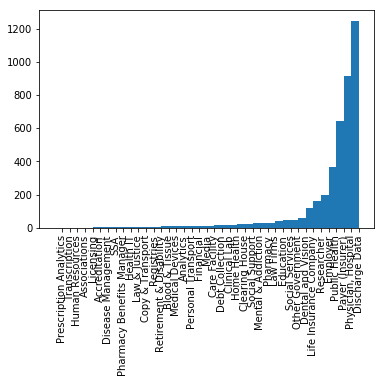

In [27]:
plot_hist(df_prcbreaches_temp.iloc[:,4:5]['Category_Name'].tolist())

### 6(a)(i)(2). Total of Breaches per State 

- We plotted this graph to further our understanding about the health data flow in the US. This graph shows California, Texas, Maryland, and New York among the states with highest incidents. 

- One of the intersting things we can infer from this graph is the impact that state laws have on the number of data breaches reported. Additionally, we see the correlation between highly populated states and number of breaches. We were not alarmed to see CA at the top. Not only is CA a densely populated state, but it was the first state to pass the breach notification law. 

- It is also not surprising that CA is one of only a few states where the word "privacy" can be found in the state's constitution. CA has also taken pride in protecting the privacy of its residents and even today we see CA as a pioner on the privacy and data security front. An example of this is the recent passing of the California Consumer Protection Act of 2018. This act mirrors the GDPR, which is the new European data privacy law, and is thought to be the most encompassing data privacy protection in the US thus far. Some legislators have been calling Congress to take action and are advocating for a federal privacy legislation. 

- If a federal privacy law passes, it is likely that it will not preempt HIPAA. But even if that is the case, the healthcare industry will see the effect of a new privacy law that can regulate entities which today are not required to abide by HIPAA. If that is the case, we can expect to see a great increase on the number of breaches reported in future years. 

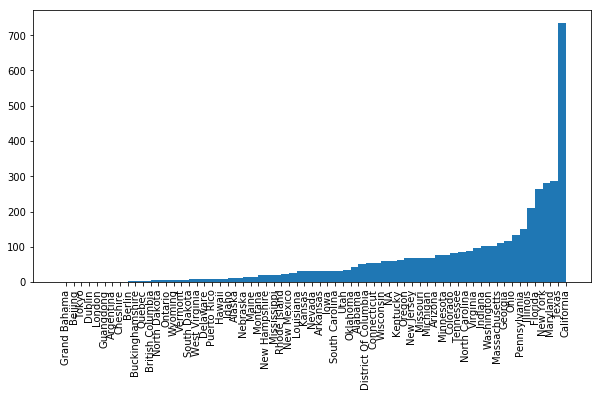

In [28]:
plt.rcParams['figure.figsize'] = [10, 5]
plot_hist(df_prcbreaches_temp.iloc[:,6:7]['State'].tolist())

#### A quick look into the States and Years with maximum breaches 

In [29]:
# Getting the list of top 10 states with least data breaches

c = (list(Counter(df_prcbreaches_temp.iloc[:,6:7]['State'].tolist()).items()))
c.sort(key = lambda item: item[1])
print(c[0:10])

[('Grand Bahama', 1), ('Beijing', 1), ('Tokyo', 1), ('Dublin', 1), ('London', 1), ('Guangdong', 1), ('Argentina', 1), ('Cheshire', 1), ('Berlin', 1), ('Buckinghamshire', 2)]


In [30]:
# Getting the years with maximum breaches
c = (list(Counter(df_prcbreaches_temp.iloc[:,10:11]['Year'].tolist()).items()))
c.sort(key = lambda item: item[1])
print(c[1:14])

[(2009, 52), (2006, 78), (2007, 79), (2008, 79), (2013, 102), (2018, 231), (2010, 236), (2012, 238), (2011, 255), (2015, 513), (2017, 617), (2016, 792), (2014, 836)]


### 6(a)(i)(3). Number of Breaches v. Type of Breach

#### We decided to break down the total number of breaches into "types" 
- Following the literature we've reviewed we were expecting the highest number to be"HACK"

- This result is also not unexpected given that most news stories about data breaches are hack-related. However, there was a chance the news were associating most data breaches with HACK(s). What is covered by the news becomes relevant in the case of health data because of the HIPAA's [notification rule](https://www.hhs.gov/hipaa/for-professionals/breach-notification/breach-reporting/index.html), which requires breaches that expose unencrypted health data of 500+ patients/users to be reported to the media.

- We were not surprised to see DISC and PHYS also at the top. PHYS refers to the cases when, for instance, someone makes a mistake that inadvertedly exposes the health information of patients. An example of that is the [Aetna case](https://www.statnews.com/2017/08/24/aetna-hiv-envelopes/), where an entity exposed the HIV status of patients through an envelope window. DISC refers to breaches involving discharged data. Even though discharge is processed so it does not identify individuals once shared, sophisticated de-cryption methods as well the increasing availability of data have lead to a higher number of breaches involving discharge data. 

- A entity covered by HIPAA must use one of two methods (expert determination and safe harbor, which includes the removal of 18 type of identifiers) to encrypt patient health information, whether stored or in transit. For more information, please see point [1.3](https://www.hhs.gov/hipaa/for-professionals/breach-notification/breach-reporting/index.html)



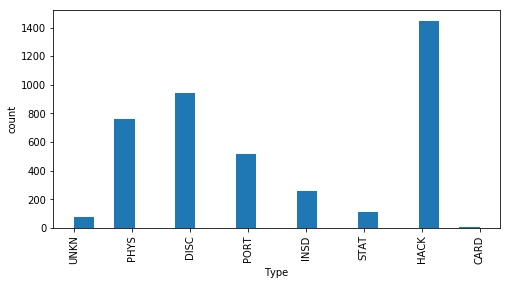

In [31]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.hist(df_prcbreaches_temp.iloc[:,12:13]['Type'].tolist(), bins=20)
# df_breach_temp.iloc[:50,13:14]['Category Name'].hist(bins =3)
plt.xlabel("Type")
plt.ylabel("count")
plt.xticks(rotation='vertical')
plt.show()

### 6(a)(i)(4). Number of breaches per year from 2005-2018. 

- Next, we plotted a graph to see the distribution of breaches per year. Our data set is limited to breaches that have occurred between 2005-2018. 

- We were expecting to see an increase in reported breaches after 2013. Hence why we are not alarmed years 2014-2016 were at the top. The reasons that was our expectation are (1) because states were starting to adopt breach notification rules, and (2) the HITECH rule passed in 2013 and modified HIPAA. 

- This modification extended liability to business associates or third parties that before did not have a duty to report. 

- California was the first state to pass a breach notification rule in 2003, even before it was mandated by HIPAA. Since its inception, HIPAA has provided a minimun standard for states to follow allowing them to adopt stricter rules. Many states followed CA and also passed their own notification rules. 

- We were at first alarmed to see 2018 being much lower than the three years prior; however, we soon realized the data we have for 2018 only goes until May 2018. So if the information is collected in the same way it was over the past few years, we do not expect that number of breaches in 2018 to be much different from the previous years. 

- The passing of a new federal privacy regulation may cause a drastic change if reporting is expanded to many entities that deal with healh information yet are not covered under HIPAA. Also, a federal privacy law may push forward a stricter breach notification law. For instance, instead of mandatory reporting to the media in breaches that affect over 500 it could make it so for all breaches. Also, improved ways to determine when a breach has occurred may change these numbers as well in the forseable future. 



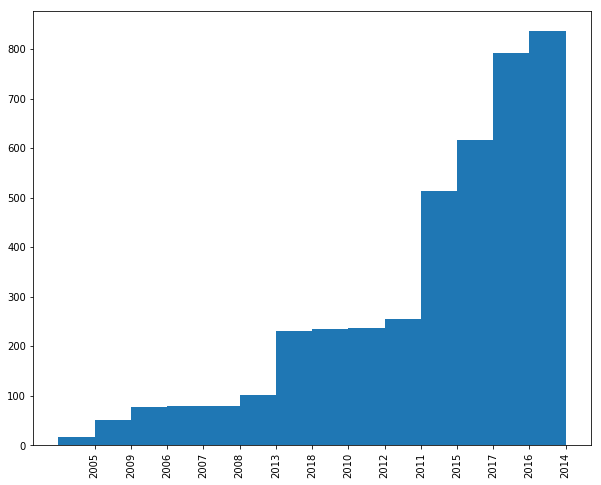

In [32]:
plt.rcParams['figure.figsize'] = [10, 8]
plot_hist(df_prcbreaches_temp.iloc[:,10:11]['Year'].tolist())

### 6(a)(i)(5). Total Number of Breaches per Entity 

- Not only health related entities handle health data. This graph represents a distribution of health data breached by entities. Our dataset grouped those entities in various categories. For instance, MED refers to medical, BSO refers to business, GOV refers to goverment, NGO refers to non-profits, and EDU refers to education (universities, high schools, etc.) 

- Our expectation was confirmed by our finding showing most health data breached comes from health (MED) entities. This category would include hospital, clinics, labs, etc. Because of the way our healthcare system works, insurance companies are heavily involved in the handling of health data in order to process payments, bill patients, etc. Therefore, seeing BSO category, which include insurance companies on the second place was also not surprising to us. 

- An interesting follow-up project may seek to break down the "MED" category into separate attributes. A similar visualization can be made by looking at the CatTo and CatFrom attributes. 

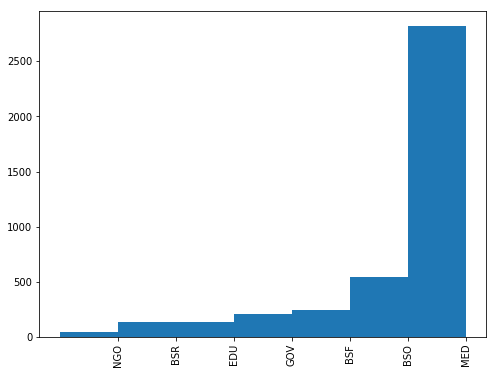

In [33]:
plt.rcParams['figure.figsize'] = [8, 6]
#plt.xticks(getMonthLabel(top_7_months))
plot_hist(df_prcbreaches_temp.iloc[:,5:6]['Entity_prc'].tolist())

### 6(a)(i)(6). Total Number of Breaches v. Reporting Entity 

#### Next, we wanted to find out which source is playing a bigger role in keeping individuals informed about data breaches. 

- We learned that US Dept of Health and Human Services was number one, which we expected because the Department of Health and Human Services (DHHS) is the enforcement agency for HIPAA and entities that are breached are required to update DHHS. 

- Similarly, we were not surprised to see the media in second place. As we previously mentioned, the HITECH rule requires health data breaches affecting 500+ individuals to be reported to the media. Because of that limitation, even though lately it feels the media is constantly reporting data breaches, we were not expecting the media to be number one. The reason is there are many small breaches (those affecting less than 500 people) that entities are not required to report to the media, yet they would have to report to the DHHS and inform users/patients.

- As per the California and Maryland AGs, it made sense they are also among the top sources. CA was the first state to pass a breach notification rule, which requires breached entities to informed consumers and report the breach to the AG if certain criteria is met. Maryland followed california and so did all the other states. The last two states to pass a breach notification law did it last year. 

- Since all states have mandates to report, we expect to see more the states with the most number of breaches to also be the states with the highest number of notifications. The media and DHHS will likely continue to be at the top since they pertain to all states. 



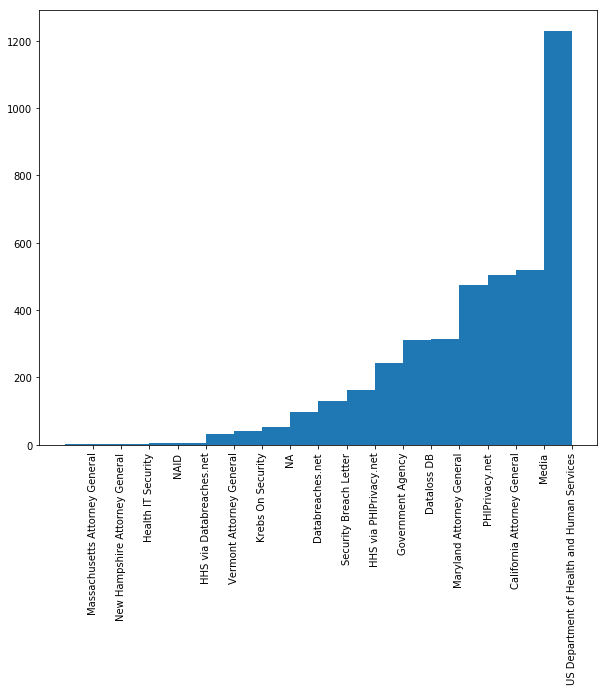

In [34]:
plt.rcParams['figure.figsize'] = [10, 8]
plot_hist(df_prcbreaches_temp.iloc[:,11:12]['Source.of.Breach.Notification'].tolist())

## 6(a)(ii). Visualization using heatmaps

Here we are plotting some heatmaps to get better view of the relationship between the attributes and compare to what we learn from the histograms. 

### 6(a)(ii)(1). Category v. Year of Breach

Firstly, we want to get an overview of how breaches are distributed in terms of year and the categories of the businesses involved. The following heatmap shows the intensity of the breaches grouped by categories and year.

This graph correlated with some of what we saw on our histograms. The most noticeable feature here can be seen in terms of the discharge data category. A closer look at that category shows year 2014 with the darkest orange color. As we mentioned above, we expected to see an increase on breaches reported after 2013 when the HITECH law passed. It does not necessarily means there were more breaches or that companies were more or less vulnerable to cyber threats. Rather, the most accurate interpretation reveals the influence that the new law (as it relates to breach notification) may have had on the rising number of breach incidents reported from 2013 to 2014. As a reminder, HITECH not only added the breach notification to HIPAA but it also expanded liability to third parties that were not previously covered. 

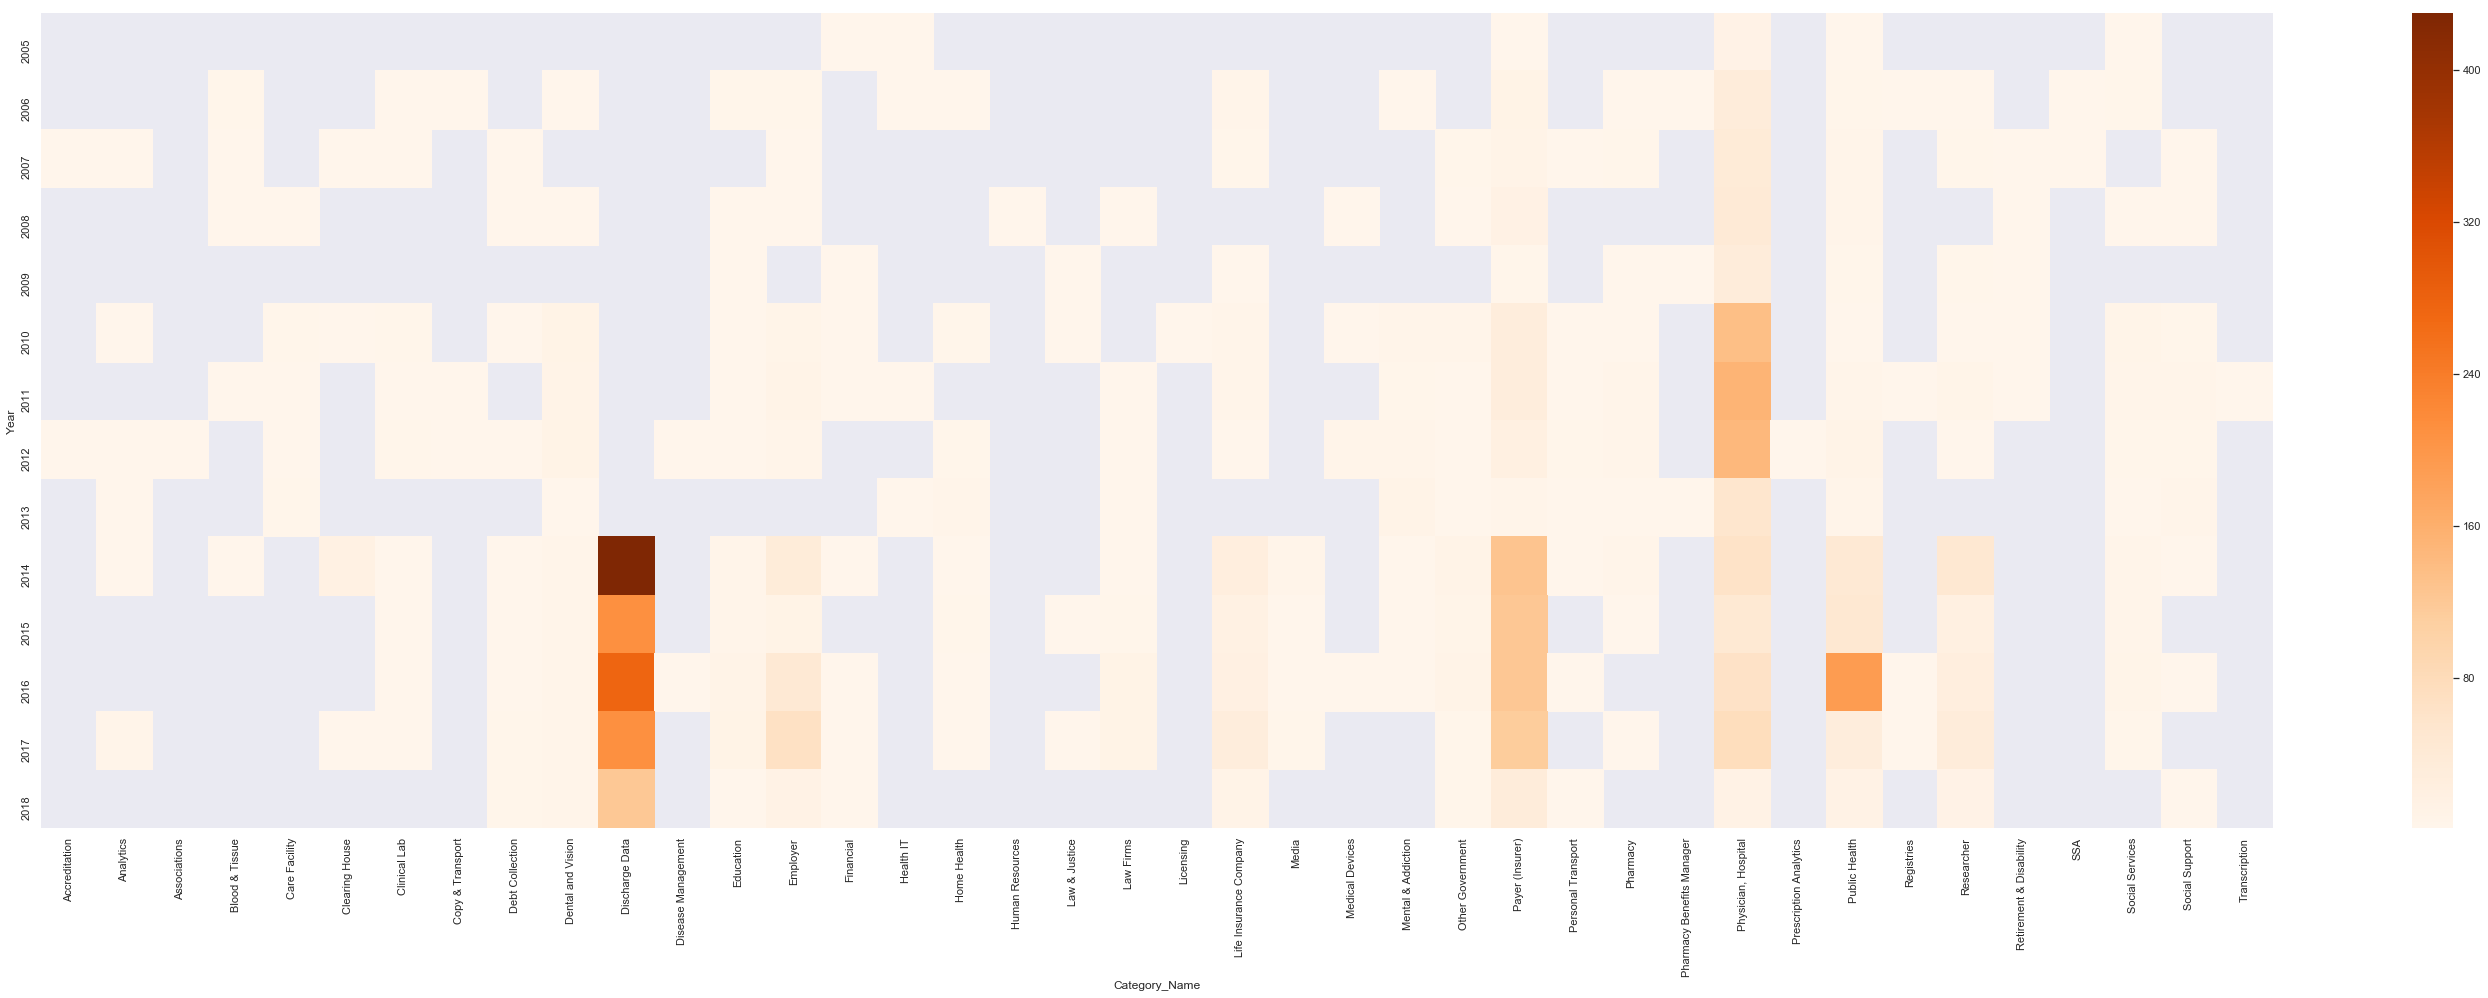

In [35]:
sns.set(rc={'figure.figsize':(50,15)})
a = df_prcbreaches_temp.groupby(['Category_Name', 'Year']).count()
agg_data = a.add_suffix('_Count').reset_index()
ha = agg_data[['Category_Name', 'Year', 'Name_Count']]
ha = ha.pivot('Year', 'Category_Name', 'Name_Count')
ha.fillna(0)
sns.heatmap(ha, cmap='Oranges')

**Analysis:** The intensity of color in the above heatmap relates to the number of breach associated with a category for a single year. Every rectangular block has an intensity of the blue color, higher intensity refers to higher number of breaches and lower intensity refers to lower number of breaches. As we can see, there is high intensity for the `Discharge Data` in the years `2014`, `2015`, `2016` and `2017`. The columns `Payer (Insurer)` and `Physician, Hospital` also have similar streak of higher intensity. Intrestingly, the `Public Health` column has higher intensity for the year `2016`. There might have occured some severe security breaches in `2016` in the `Public Health` sector. A quick google showed [related result](https://www.healthcare-informatics.com/news-item/cybersecurity/report-healthcare-data-breaches-hit-all-time-high-2016).

### 6(a)(ii)(2). Year of Breach v. State 

Another heap map that we are plotting here shows the breach intensity for a year within a US state

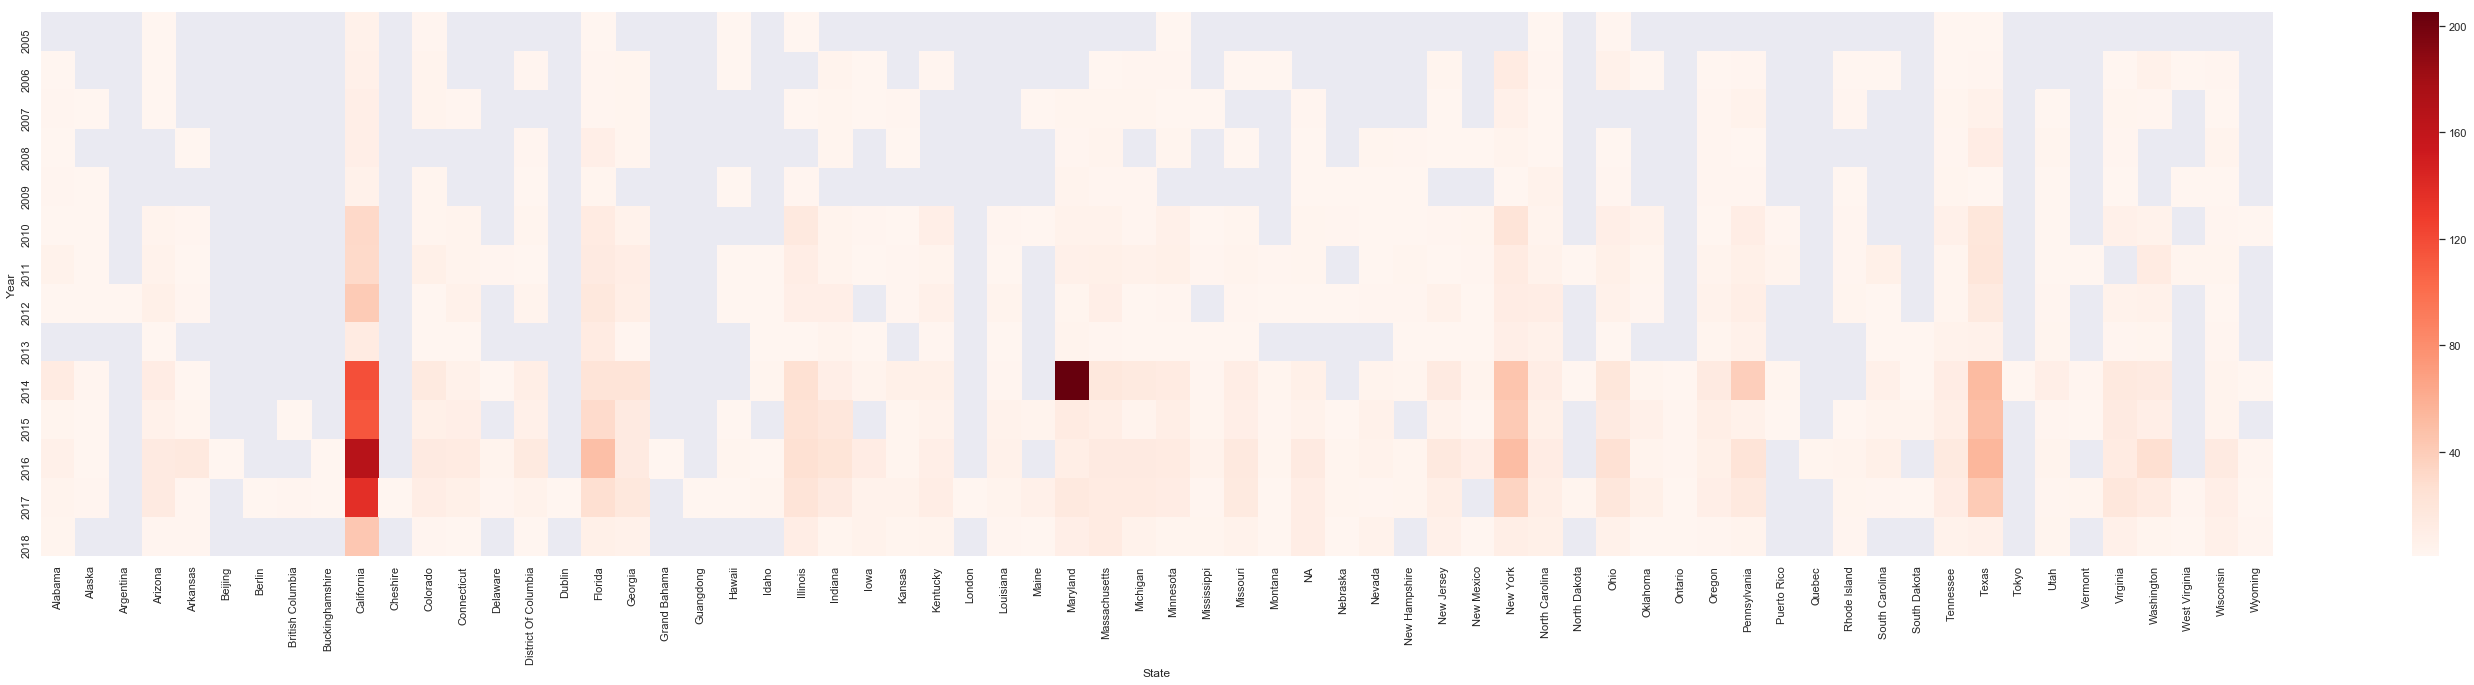

In [36]:
#import seaborn as sns
sns.set(rc={'figure.figsize':(50,10)})
a = df_prcbreaches_temp.groupby(['State', 'Year']).count()
agg_data = a.add_suffix('_Count').reset_index()
ha = agg_data[['State', 'Year', 'Name_Count']]
ha = ha.pivot('Year', 'State', 'Name_Count')
ha.fillna(0)
sns.heatmap(ha, cmap='Reds')

**Analysis** We see that California is the State that has maximum number of breach incidences followed by Maryland. Although the breaches were consistently high in California, but Maryland experienced the maximum breach incidents in the year `2014` where with some reading we found some information [maryland_breach](https://healthitsecurity.com/news/maryland-court-dismisses-carefirst-data-breach-lawsuit) that provided us some interesting facts about the incidents.

### 6(a)(ii)(2). **`Type` of Breach v. `Year`**
To get an overview of how types of data breaches are distributed according to year, we will be plotting heatmap with `Year` and `Type` variables.

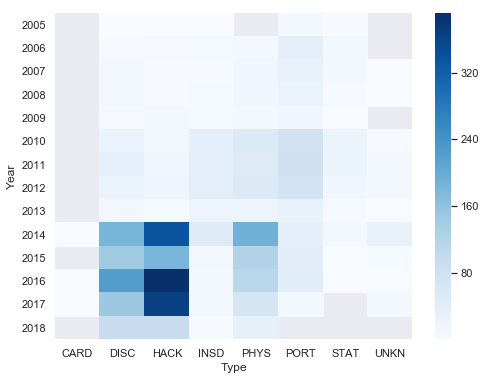

In [37]:
sns.set(rc={'figure.figsize':(8,6)})
a = df_prcbreaches_temp.groupby(['Type', 'Year']).count()
agg_data = a.add_suffix('_Count').reset_index()
ha = agg_data[['Type', 'Year', 'Name_Count']]
ha = ha.pivot('Year', 'Type', 'Name_Count')
ha.fillna(0)
sns.heatmap(ha, cmap='Blues')

We find that `HACK` records are kind of consistent across the years with exception for year 2014. Still `HACK` is the major breach `Type` for the year `2014`. There are more breaches for `PHYS` in year 2013 compared to other years for `PHYS`.

### 6(a)(ii)(3). Source of Breach Notification v. State

Analyzing the Source of breach notification's role in each State through a heatmap

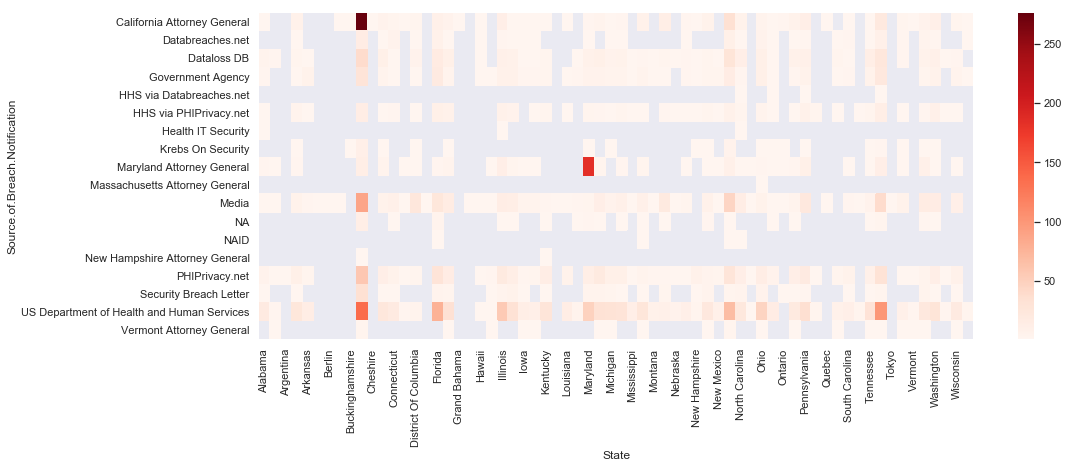

In [38]:
sns.set(rc={'figure.figsize':(16,6)})
a = df_prcbreaches_temp.groupby(['Source.of.Breach.Notification', 'State']).count()
agg_data = a.add_suffix('_Count').reset_index()
ha = agg_data[['Source.of.Breach.Notification', 'State', 'Name_Count']]
ha = ha.pivot('Source.of.Breach.Notification', 'State', 'Name_Count')
ha.fillna(0)
sns.heatmap(ha, cmap='Reds')

***Analysis*** Here we see that `California Attorney General` and `Maryland Attorney General` were the source that notified maximum breach incidents in the respective states. We also observed that `US Health and Human Services` department was another key source in `California` through which these incidents got reported.

We can also not neglect the role of `Media` in reporting about such incidents.


### 6(a)(ii)(4). CatFrom v. CatTo (Health Data Flow between Categories)

We have used the `edges` table to draw a cool heat map that makes us easier to understand the flow of information from one category department to the other. Sections or small sublocks that are not colored indicate that no information has been exchanged between those departments. We can look for the dark shaded blocks to find the categories that shared data.


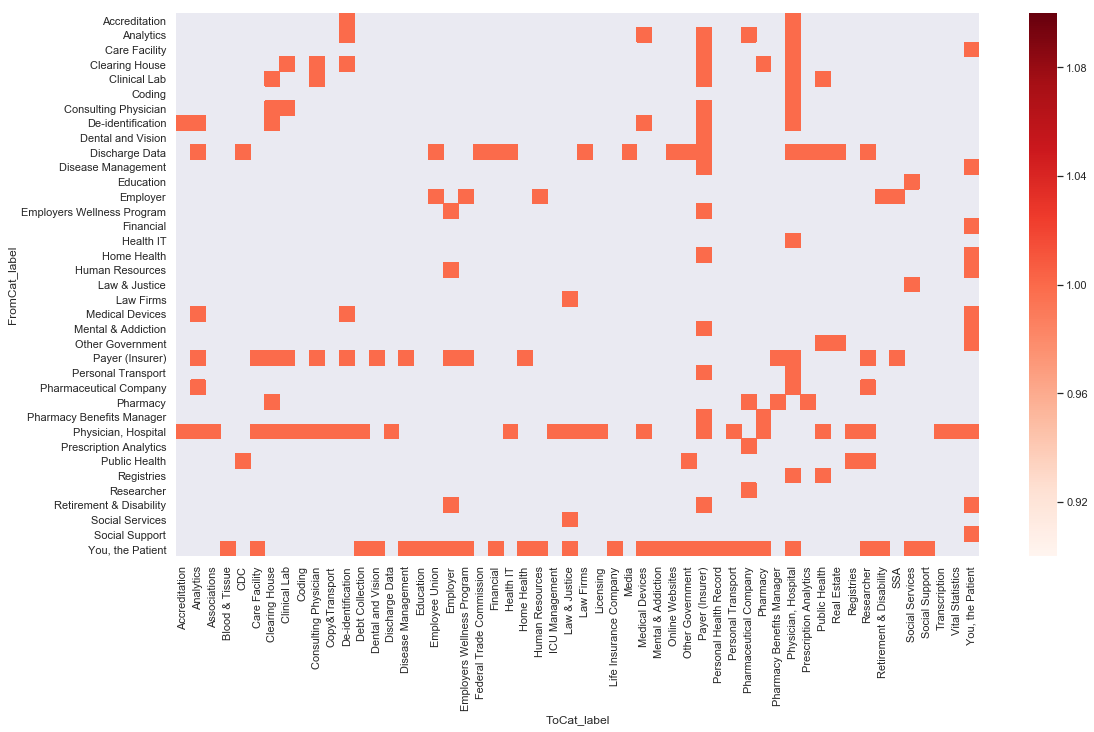

In [39]:
"""Flow of dat from to To category Ids"""
sns.set(rc={'figure.figsize':(18,10)})
a = df_fromCat_toCat.groupby(['FromCat_label', 'ToCat_label']).count()
agg_data = a.reset_index()
ha = agg_data[['FromCat_label', 'ToCat_label', 'Count']]
ha = ha.pivot('FromCat_label', 'ToCat_label', 'Count')
ha.fillna(0)
sns.heatmap(ha, cmap='Reds')

### 6(a)(ii)(5) Category v. Category (Correlation heatmap and dependency analysis)

For understanding the relation between the various categories, we have plotted a correlation graph. Since our columns are categorical we are using chi-squared independence test to get a metric of dependency between the columns.  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


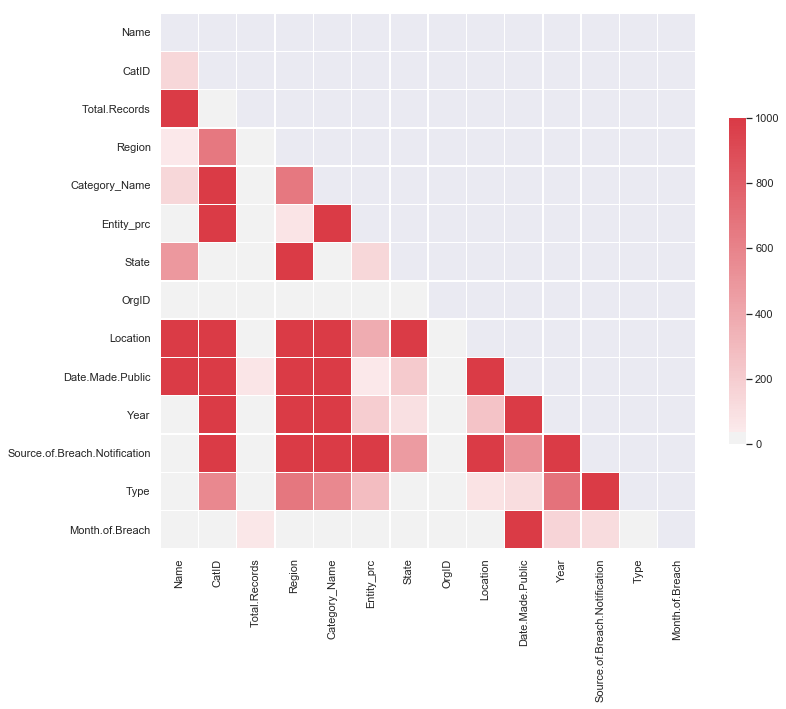

In [40]:
collection_p_values = []
for compare_column in df_prcbreaches_temp.columns.tolist():
    c_data = [] 
    for compare_with in df_prcbreaches_temp.columns.tolist():
        X = df_prcbreaches_temp[compare_column].astype(str)
        Y = df_prcbreaches_temp[compare_with].astype(str)
        X.name = X.name + "__"
        df_observed = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(df_observed.values)
        c_data.append(p)
    collection_p_values.append(c_data)
p_values = pd.DataFrame(collection_p_values, columns=df_prcbreaches_temp.columns.tolist(), index=df_prcbreaches_temp.columns.tolist())


p_values.index = p_values.columns
log_values = p_values.apply(lambda x: np.log(x)*-1)

mask = np.zeros_like(log_values, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
log_values.replace(np.inf, 10000, inplace=True)
sns.heatmap(log_values, mask=mask, cmap=cmap, vmax=1000, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Analysis** : The square with higher color intensity in the above graph show higher correlation between the columns. The `OrgID` column seems to be perfectly random and the Chi square test seems to reflect the randomness with minimum intensity and we can infer that the column is independent of any other columns. The column `Source.of.Breach.Notification` seems to be highly correlated with the columns `CatID`, `Region`, `Entity_prc`, `Location`, `Year` and `Type`. Similarly, we can observe that `Location` seems to be highly correlated with `CatId`, `Region`, `Source.of.Breach.Notification`.

# 6(b). Data Prediction and Modelling

## 6(b)(1). Linear Regression Model

We have data for number of breaches for a certain year. One of the possible things that we can do with that data is to predict the number of breaches for next upcoming years. We can train a regression model and use that regression model to predict the number of breaches for next year. 

In the following section we will train a regression model and try to predict the number of breach for the upcoming years.

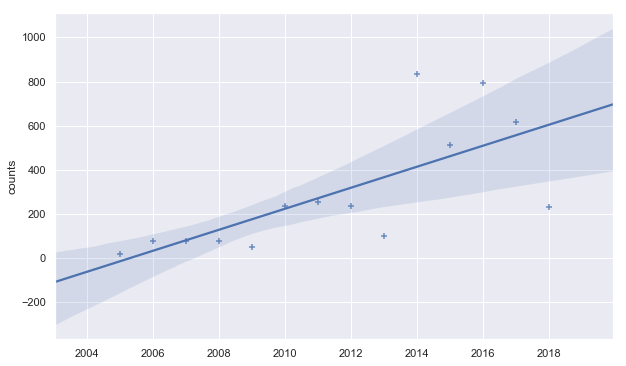

In [41]:
record_counts = df_prcbreaches_temp.groupby('Year').count()
record_counts['counts'] = record_counts['Name']
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.regplot(x=record_counts.index.tolist(), y=record_counts['counts'], marker='+')

#### Note: 

The above graph is a regression plot for the data set we have. On the x-axis are the years while on the y-axis are the counts of breaches. There is also a linear regression line that can be used to predict the future values. The following code breaks the plot into a usable model and we will use the model to predict new data.

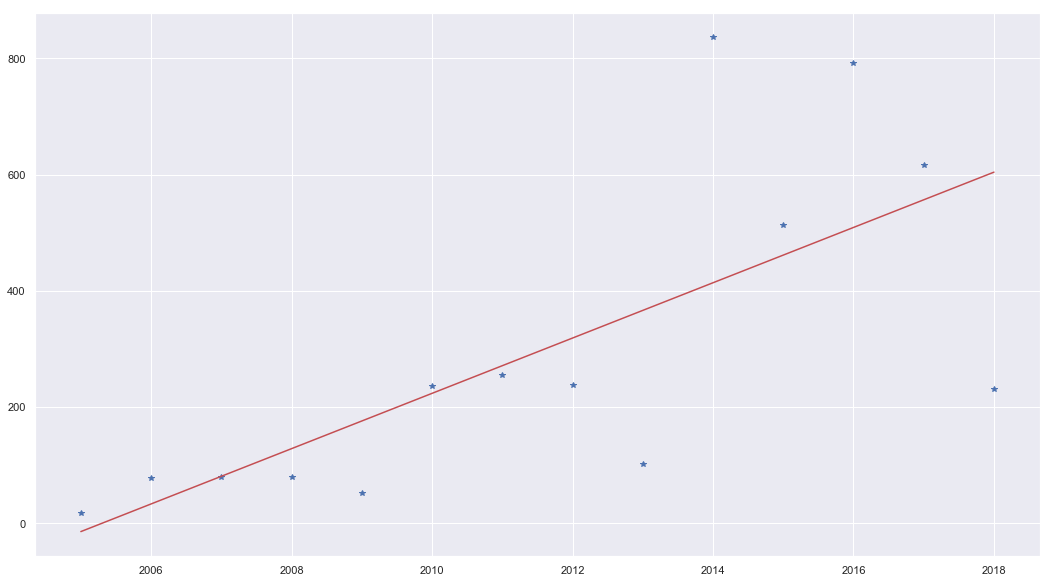

In [42]:
slope, intercept , r_value ,p_value, std_err = stats.linregress(x=record_counts.index.tolist(), y=record_counts['counts'])
plt.plot(record_counts.index.tolist(), record_counts['counts'],'*',label = 'line')
plt.plot(record_counts.index.tolist(), (intercept+slope*record_counts.index).tolist(),'r',label='regression line')
plt.show()

#### Analysis: 

In the above code, we have `slope_Cal, intercept_Cal , r_value_Cal ,p_value_Cal, std_err_Cal` variables that represent our linear regression model. The important variables are the `slope_Cal` and `intercept_Cal`, using these two we can predict the number of breaches for the coming years. Let's predict the number of breach for the year `2020`.

Of course, this prediction does not take into consideration any drastric changes that may happen to our state or federal privacy laws. The estimated number of breaches (approximately 700) that our model predicts for the year 2020 is congruent with the numbers we have seen over the past few years. However, CA recenlty passed a privacy law that is expected to come into effect in 2020. CA can adopt stricter privacy guidelines for health care data than HIPAA offers so long as the state law does not preempt the federal law. 

Aside from the changes we may see in the futre in terms of the updates to CA state law, privacy rights groups are advocating for congress to pass a federal privacy law. If this law passes in the near future, it is hard to tell how it will influence the results we are predicting here. However, we can assume that, if the change further expands liability to third partties the same way HITECH did, we will see an increase of reported breaches in the future in the same way we saw it after 2014. There is also the possibility that healthcare organizations adopt better technologies, improve employee training and conduct periodic risk assesments, which it can all help reduce the number of data breaches we see today. 

In [43]:
pred_year = 2020
num_of_breaches = intercept + slope * pred_year
print ("The number of breaches for year", pred_year, "could be", num_of_breaches)


The number of breaches for year 2020 could be 699.239560439557


#### Note: 
We can also use similar regression model to predict the number of breaches for certain states. We will use the code below to observe `California` state and try to predict number of breaches for this state.

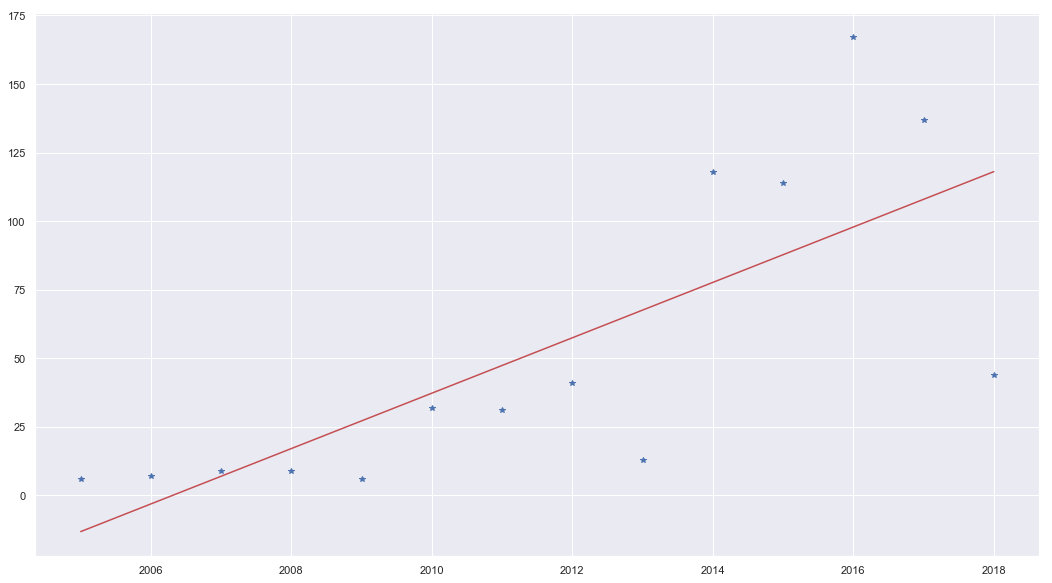

In [44]:
df_prcbreaches_temp.describe()
state_dist = df_prcbreaches_temp[df_prcbreaches_temp['State'] == "California"].groupby('Year').count()
slope_Cal, intercept_Cal , r_value_Cal ,p_value_Cal, std_err_Cal = stats.linregress(x=state_dist.index.tolist(), y=state_dist['Name'])
plt.plot(state_dist.index.tolist(), state_dist['Name'],'*', label = 'line')
plt.plot(state_dist.index.tolist(), (intercept_Cal+slope_Cal*state_dist.index).tolist(),'r',label='regression line')
plt.show()

In [45]:
pred_year = 2020
num_of_breaches = intercept_Cal + slope_Cal * pred_year
print ("The number of breaches for year", pred_year, "in California could be", num_of_breaches)


The number of breaches for year 2020 in California could be 138.25054945054944


## 6(b)(2). Decision Tree

Base on the correlation heatmap we want to predict the type of breach based on the other fields. We will be using the Decision Tree model to train and predict based on our dataset. But before we start we want to convert our categorical data to numerical ones using the `LabelEncoder` because the decision tree model in the scipy library doesn't deal with the categorical model. 

In [46]:
##Predicting region based on the X values
X= df_prcbreaches_temp[["Category_Name",'Source.of.Breach.Notification','Year', 'State' ]] #,'Source.of.Breach.Notification'
# Y_Type =  df_prcbreaches_temp[["Category_Name",'Source.of.Breach.Notification','Year','Type' ]]

In [47]:
#y = df_prcbreaches_temp['Type']
y = df_prcbreaches_temp['Type']
le_for_y = LabelEncoder()
le_for_y.fit(y)
y = le_for_y.transform(y)

In [48]:
#Regions
le_for_y.classes_

array(['CARD', 'DISC', 'HACK', 'INSD', 'PHYS', 'PORT', 'STAT', 'UNKN'],
      dtype=object)

In [49]:
def getFloatTransformationforColumns(X):
    le_list = []
    for item in X.columns:
        le = LabelEncoder()
        le.fit(X[item])
        X[item] = le.transform(X[item])
        le_list.append(le)
    return le_list

label_lst_result = getFloatTransformationforColumns(X)
#label_lst_result_src = getFloatTransformationforColumns(X_src)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
#very imp
for index, label_encoder in enumerate(label_lst_result):
    print (X.columns[index], list(enumerate(label_encoder.classes_)))

Category_Name [(0, 'Accreditation'), (1, 'Analytics'), (2, 'Associations'), (3, 'Blood & Tissue'), (4, 'Care Facility'), (5, 'Clearing House'), (6, 'Clinical Lab'), (7, 'Copy & Transport'), (8, 'Debt Collection'), (9, 'Dental and Vision'), (10, 'Discharge Data'), (11, 'Disease Management'), (12, 'Education'), (13, 'Employer'), (14, 'Financial'), (15, 'Health IT'), (16, 'Home Health'), (17, 'Human Resources'), (18, 'Law & Justice'), (19, 'Law Firms'), (20, 'Licensing'), (21, 'Life Insurance Company'), (22, 'Media'), (23, 'Medical Devices'), (24, 'Mental & Addiction'), (25, 'Other Government'), (26, 'Payer (Insurer)'), (27, 'Personal Transport'), (28, 'Pharmacy'), (29, 'Pharmacy Benefits Manager'), (30, 'Physician, Hospital'), (31, 'Prescription Analytics'), (32, 'Public Health'), (33, 'Registries'), (34, 'Researcher'), (35, 'Retirement & Disability'), (36, 'SSA'), (37, 'Social Services'), (38, 'Social Support'), (39, 'Transcription')]
Source.of.Breach.Notification [(0, 'California Attor

#### Note: 

Now that our encoding is done, we will save the encoding schema to use it later to decode the decision tree model. Finally, we will train our model to do the prediction. We will start by breaking data into training and testing set and then fitting it to our model. We will use the trained model to predict and calculate accuracy. 

In [51]:
X_train, X_test , y_train, y_test= train_test_split(X, y, test_size=0.30, shuffle=True)

In [52]:
dt_classifier = DecisionTreeClassifier(min_samples_split=50)
dt_classifier.fit(X_train, y_train)
# min_samples_split=800
# predict
y_pred = dt_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.43376413570274636


#### Analysis: 

The decision tree model we used has an accuracy of `44.99%` which is less than ideal to be used in real-world scenarios, but we might be able to find better accuracy if we are able to expand our data set or perhaps use other models. But before trying with another model let's see what our decision tree looks like actually. 

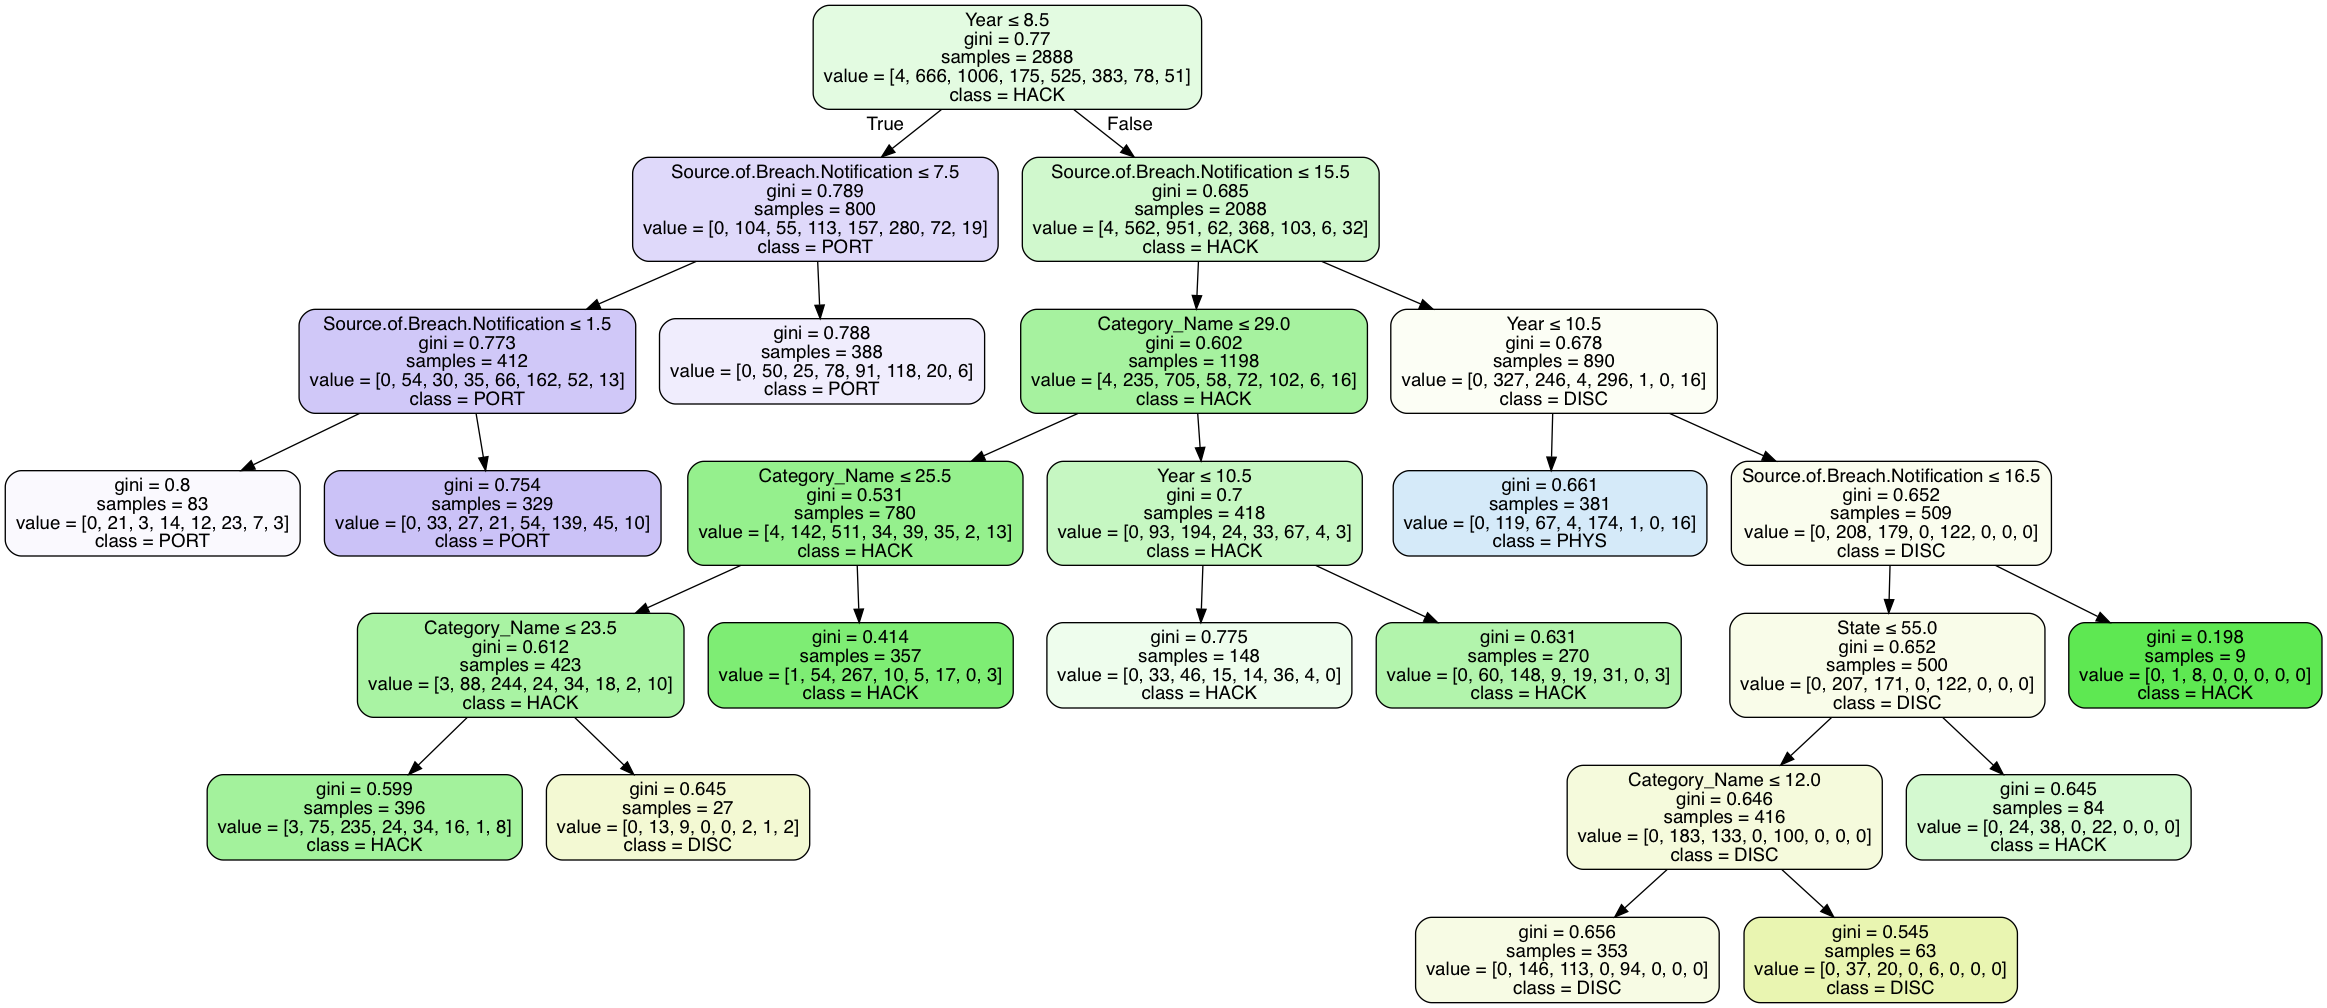

In [53]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# we are minimizing the depth of decision tree by specifying higher min_sample_split
dt_classifier = DecisionTreeClassifier(min_samples_split=400)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,
                 filled=True, rounded=True, feature_names=X.columns, 
class_names=le_for_y.classes_, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### Analysis: 

The decision tree model turned out categorical data set to a numerical data set and used it as continious data. However we can decode the data using the `LabelEncoder` schema we had saved previously. 

## 6(b)(3). KNN Model

Decision Trees performed poorly for the data set above, we now try to use a new model for the prediction. We will repeat same procedure for the new model as we did for the Decision Tree.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40)
model.fit(X_train, y_train) 
# Predict the labels for X_test => y_predict
# accuracy is comparison between true value and predictions
# y_test

y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.4087237479806139


#### Analysis: 

Accuracy score for the KNN is simillar to the one with the decision tree model. It seems like Decision tree works better for the purpose compared to the KNN.

## 6(b)(4). Random Forest

We can again try to find better accuracy with a Random Forest model. We fit a simple model for our data set to observe how it goes.

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(min_samples_split=50)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.4418416801292407


#### Analysis: 

Random Forest classifier seems to be better than decision tree and K nearest neighbour with slightly increase in accuracy. But the overall accuracy is still below 50%, one of the reason might be the number of possible values that we should predict since `Type` field has 8 unique categories predicting them accurately would be difficult compared to a binary categorical data.

# Predicting `State` based on `Category_Name`, `Year`, `Source.of.Breach.Notification` and `Type`

We can predict one of the attribute based on other attributes using our models. Can we accurately predict the state based on other attributes? If we can do so we can use the model for the future analysis of the problem. We initially noticed that there were many variables with missing values so we might be able to get those missing values using our model. Also, it would be more interesting to see whether category_name, year, source and type of breach can infer the location of that organization. 

## 1. Using the Decision Tree Model

In [56]:
X_state = df_prcbreaches_temp[["Category_Name",'Source.of.Breach.Notification','Year', 'Type' ]] #,'Source.of.Breach.Notification'
y_state = df_prcbreaches_temp['State']
le_for_y_state = LabelEncoder()
le_for_y_state.fit(y_state)
y_state = le_for_y_state.transform(y_state)

label_lst_result_state = getFloatTransformationforColumns(X_state)

X_train_state, X_test_state , y_train_state, y_test_state = train_test_split(X_state, y_state, test_size=0.30, shuffle=True)

dt_classifier_state = DecisionTreeClassifier(min_samples_split=50)
dt_classifier_state.fit(X_train_state, y_train_state)
# min_samples_split=800
# predict


y_pred_state = dt_classifier_state.predict(X_test_state)
print('Accuracy : ', accuracy_score(y_test_state, y_pred_state))

Accuracy :  0.19951534733441034


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Predicted accuracy for State here is approx. ***20%***

## 2. Using the KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model_state = KNeighborsClassifier(n_neighbors=40)
model_state.fit(X_train_state, y_train_state) 
y_predict_state = model_state.predict(X_test_state)
print(accuracy_score(y_test_state, y_predict_state))

0.19789983844911146


Predicted accuracy for State here is approx. ***21%***

## 3. Using the Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model_state = RandomForestClassifier(min_samples_split=50)
rf_model_state.fit(X_train_state, y_train_state)
y_predict_state = rf_model_state.predict(X_test_state)
print(accuracy_score(y_test_state, y_predict_state))

0.20678513731825526


Predicted accuracy for State here is again approx. ***20%***

**Analysis** Prediction of state seems to have lower accuracy than prediction of the type of breach. We can look at the number of unique class the state column has.

In [59]:
len(df_prcbreaches_temp['State'].unique())

66

#### Analysis: 

The state column has `66` separate classes, so one of the possible reasons for why our model performed bad predicting state would be due to large set of distinct classes. Also, we can use more sophisticated model to predict the result based on our data. 

# 7. Challenges 

- Incomplete data set with many empty cells 
- Numeric vs. categorical values 
- Understanding how the law applies (state and federal levels) 


# 8. Future work 

There are many ways in which this data set could be used in the future. For instance, one thing we could do would be to integrate the data we have already cleaned with other set available on thedatamap.org website regarding health mobile devices. 

Additionally, with this information we could also predict other factors we did not get a chance to look at. For instance, in addition to predicting the number of breaches in 2020 and learning more about what roles reporting agencies will have in the future, we could look in depth at the type of breaches that may be most prevalent, the location of those breaches. 

Because this data set is so dependent on the changes in our privacy laws, there will be many future applications for the information we have uncovered. 

Also, with the potential modifications of privacy laws in the US we can make better analysis on how these modifications have brought better impact in curbing the privacy breaches. 

# THANK YOU FOR A GREAT SEMESTER! 

### The End!